In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data=pd.read_csv("loan/Loan_data_dictionary.csv")
data_train=pd.read_csv("loan/Loan_train.csv")
data_test=pd.read_csv("loan/Loan_test.csv")

In [3]:
data

,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN
5,5,branch_id,Branch where the loan was disbursed,NaN
6,6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,8,Current_pincode,Current pincode of the customer,NaN
9,9,Date.of.Birth,Date of birth of the customer,NaN


In [4]:
data_train

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-88,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-88,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-76,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [5]:
data_test.iloc[:40, :]


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
5,725530,57657,71211,84.64,78,17014,45,2103,01-01-68,Self employed,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1
6,708592,48518,62767,82.85,78,17014,45,2071,06-09-82,Salaried,...,0,0,0,2122,0,0,0,1yrs 7mon,2yrs 5mon,0
7,714975,48743,63896,81.38,78,17014,45,2079,24-11-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
8,712795,50295,63896,82.35,78,17014,45,2071,01-01-88,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
9,708656,51653,67445,81.55,78,17014,45,2078,01-01-99,NaN,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [6]:
data_train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [7]:
data_test.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [8]:
data_train_clean=data_train.dropna(subset=['Employment.Type'])

In [9]:
data_train_clean.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [10]:
data_test_clean=data_test.dropna(subset=['Employment.Type'])

In [11]:
data_test_clean.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [12]:
data_train_clean.shape

(225493, 41)

In [13]:
data_test_clean.shape

(108949, 40)

In [14]:
# Save the cleaned data to a CSV file
data_train_clean.to_csv("Loan/Loan_train_clean.csv", index=False)

In [15]:
data_test_clean.to_csv("Loan/Loan_test_clean.csv", index=False)

In [16]:
# Load the cleaned training and testing datasets
data_train = pd.read_csv("Loan/Loan_train_clean.csv")
data_test = pd.read_csv("Loan/Loan_test_clean.csv")

All mandatory columns are present in the training data.
All mandatory columns are present in the test data.


C:\Users\arnab\AppData\Local\Temp\ipykernel_12036\487099381.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_train[col] = pd.to_datetime(data_train[col])
C:\Users\arnab\AppData\Local\Temp\ipykernel_12036\487099381.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_test[col] = pd.to_datetime(data_test[col])
C:\Users\arnab\AppData\Local\Temp\ipykernel_12036\487099381.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_train[col] = pd.to_datetime(data_train[col])
C:\Users\arnab\AppData\Local\Temp\ipykernel_12036\487099381.py:44: UserWarning: Could not inf

Sample predictions:
   UniqueID  Predicted_loan_default
0    655269                       0
1    723482                       0
2    758529                       0
3    763449                       0
4    708663                       0


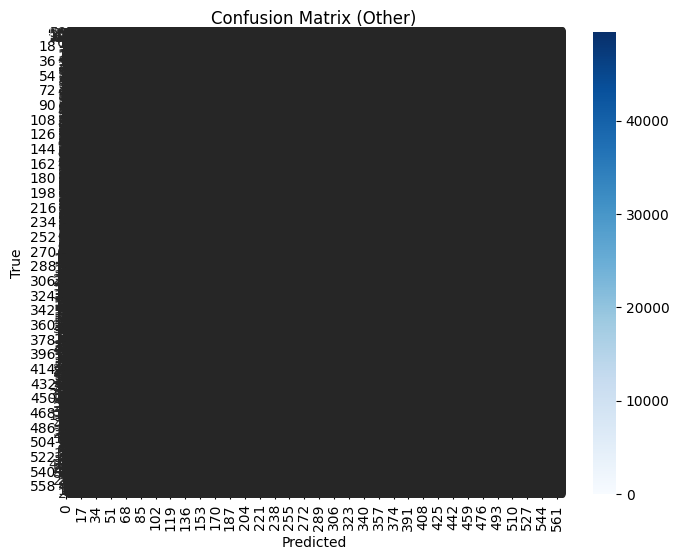

In [17]:
#USING PCA AND KNN
import matplotlib.pyplot as plt
import seaborn as sns
mandatory_columns = [
    'UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id',
    'Current_pincode_ID', 'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
    'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
    'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
    'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
    'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
    'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
    'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'
]

# Check if all mandatory columns are present in the training data
missing_columns_train = set(mandatory_columns) - set(data_train.columns)
if missing_columns_train:
    print(f"Error: The following mandatory columns are missing in the training data: {missing_columns_train}")
else:
    print("All mandatory columns are present in the training data.")

    # Check if all mandatory columns are present in the test data
    missing_columns_test = set(mandatory_columns) - set(data_test.columns)
    if missing_columns_test:
        print(f"Error: The following mandatory columns are missing in the test data: {missing_columns_test}")
    else:
        print("All mandatory columns are present in the test data.")

        # Data Preprocessing
        # Fill missing values in 'Employment.Type' with the mode
        mode_employment_type = data_train['Employment.Type'].mode()[0]
        data_train['Employment.Type'] = data_train['Employment.Type'].fillna(mode_employment_type)
        data_test['Employment.Type'] = data_test['Employment.Type'].fillna(mode_employment_type)

        # Encode 'Employment.Type' column separately to handle unseen labels
        le = LabelEncoder()
        le.fit(data_train['Employment.Type'])
        data_train['Employment.Type'] = le.transform(data_train['Employment.Type'])
        data_test['Employment.Type'] = data_test['Employment.Type'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else mode_employment_type)

        # Preprocess date columns
        date_columns = ['Date.of.Birth', 'DisbursalDate']
        for col in date_columns:
            data_train[col] = pd.to_datetime(data_train[col])
            data_test[col] = pd.to_datetime(data_test[col])
            data_train[col] = data_train[col].dt.year
            data_test[col] = data_test[col].dt.year 
        # Preprocess 'AVERAGE.ACCT.AGE' and 'CREDIT.HISTORY.LENGTH' columns
        date_columns = ['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']
        for col in date_columns:
            data_train[col] = data_train[col].apply(lambda x: int(x.split()[0].replace('yrs', '')) * 12 + int(x.split()[1].replace('mon', '')) if isinstance(x, str) else x)
            data_test[col] = data_test[col].apply(lambda x: int(x.split()[0].replace('yrs', '')) * 12 + int(x.split()[1].replace('mon', '')) if isinstance(x, str) else x)


        # Preprocess non-numeric columns
        non_numeric_cols = data_train.select_dtypes(exclude=['number']).columns.tolist()
        for col in non_numeric_cols:
            le = LabelEncoder()
            data_train[col] = le.fit_transform(data_train[col])
            data_test[col] = le.transform(data_test[col])

        # Remove non-numeric columns from the dataset
        numeric_data_train = data_train.drop(columns=non_numeric_cols)
        numeric_data_test = data_test.drop(columns=non_numeric_cols)

        # Feature scaling
        scaler = StandardScaler()
        
        # Check if 'loan_default' is present in the test data
        if 'loan_default' not in numeric_data_test.columns:
            # Drop 'loan_default' from training data before fitting the scaler
            numeric_data_train = numeric_data_train.drop(columns=['loan_default'])
            X_train = scaler.fit_transform(numeric_data_train.drop(columns=missing_columns_train))
            X_test = scaler.transform(numeric_data_test.drop(columns=missing_columns_train))
        else:
            X_train = scaler.fit_transform(numeric_data_train)
            X_test = scaler.transform(numeric_data_test)


        
        # Apply PCA for dimensionality reduction
        pca = PCA(n_components=10) #reduce to 10 principal components
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train KNN classifier
        knn = KNeighborsClassifier(n_neighbors=5) 
        knn.fit(X_train_pca, data_train['loan_default'])

        # Predict loan default using the trained model
        predictions = knn.predict(X_test_pca) 

        # Handling predictions
        data_test['Predicted_loan_default'] = predictions

        # Saving predictions to a CSV file
        data_test.to_csv('predictions.csv', index=False)

        print("Sample predictions:")
        print(data_test[['UniqueID', 'Predicted_loan_default']].head())

        
        
        # Calculate confusion matrix
        if 'loan_default' in numeric_data_test.columns:
            y_true = data_test['loan_default']
            cm = confusion_matrix(y_true, predictions)
        
            # Plot confusion matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()
        else:
            # Calculate confusion matrix based on 'your_other_column_name'
            y_true_other = data_test['PERFORM_CNS.SCORE']
            cm_other = confusion_matrix(y_true_other, predictions)
        
            # Plot confusion matrix based on 'your_other_column_name'
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm_other, annot=True, fmt='d', cmap='Blues')
            plt.title('Confusion Matrix (Other)')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()
